<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 198.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 214.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 185.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 152.8 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("survey-data.csv")

df.head()

--2025-05-19 12:24:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.7MB/s    in 2.6s    

2025-05-19 12:24:58 (57.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



/tmp/ipykernel_301/3625192642.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[(new_df["ConvertedCompYearly"] >= limite_inferior) & (df["ConvertedCompYearly"] <= limite_superior)]


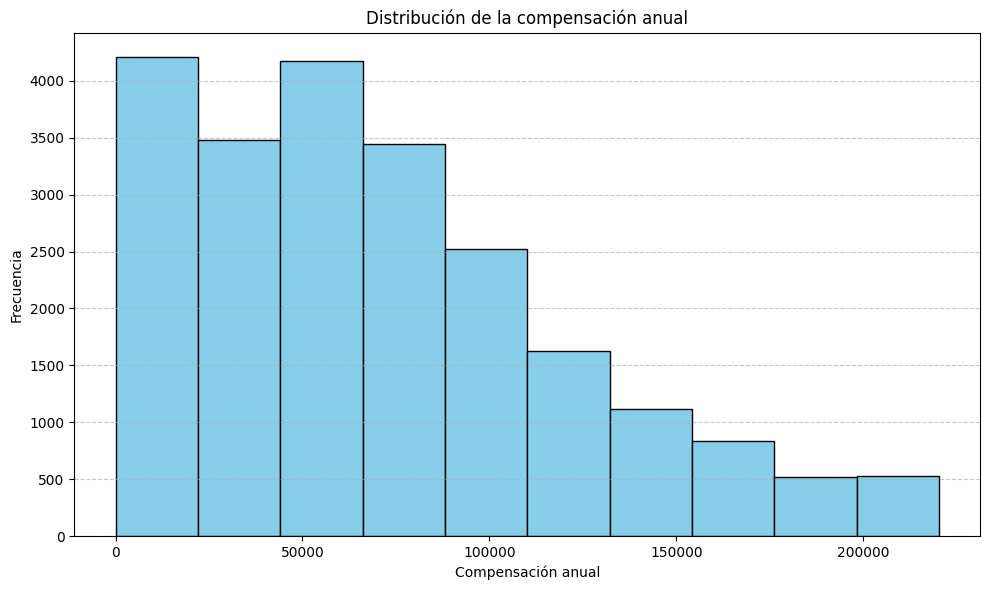

In [3]:
new_df = df[["ConvertedCompYearly"]].dropna()

Q1 = new_df["ConvertedCompYearly"].quantile(0.25)
Q3 = new_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = new_df[(new_df["ConvertedCompYearly"] >= limite_inferior) & (df["ConvertedCompYearly"] <= limite_superior)]

plt.figure(figsize=(10, 6))
plt.hist(new_df, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de la compensación anual')
plt.xlabel('Compensación anual')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



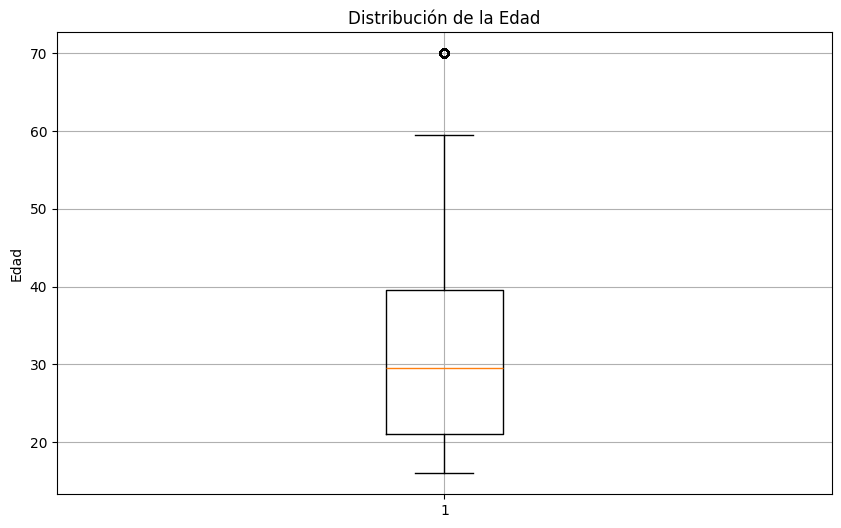

In [4]:
age_df = df[["Age"]].dropna()

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

age_df['AgeNumeric'] = age_df['Age'].map(age_map)

plt.figure(figsize=(10,6))
plt.boxplot(age_df['AgeNumeric'].dropna().tolist())
plt.title("Distribución de la Edad")
plt.ylabel("Edad")
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



/tmp/ipykernel_301/452203094.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[(new_df["ConvertedCompYearly"] >= limite_inferior) & (df["ConvertedCompYearly"] <= limite_superior)]


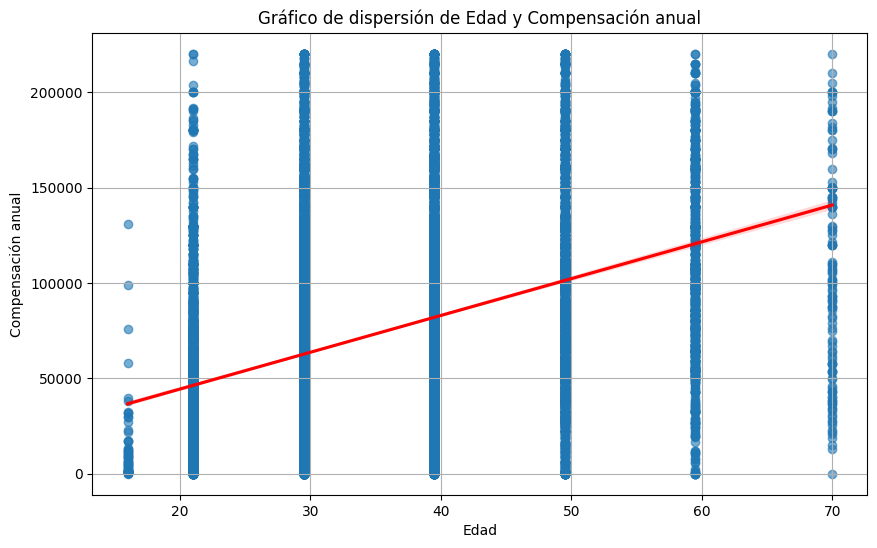

In [5]:
new_df = df[["Age","ConvertedCompYearly"]].dropna()

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

new_df['AgeNumeric'] = new_df['Age'].map(age_map)
new_df = new_df[["AgeNumeric", "ConvertedCompYearly"]].dropna()

Q1 = new_df["ConvertedCompYearly"].quantile(0.25)
Q3 = new_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = new_df[(new_df["ConvertedCompYearly"] >= limite_inferior) & (df["ConvertedCompYearly"] <= limite_superior)]

plt.figure(figsize=(10, 6))
sns.regplot(data=new_df, x="AgeNumeric", y="ConvertedCompYearly", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Gráfico de dispersión de Edad y Compensación anual")
plt.xlabel("Edad")
plt.ylabel("Compensación anual")
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


/tmp/ipykernel_301/393950830.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['AgeNumeric'] = new_df['Age'].map(age_map)


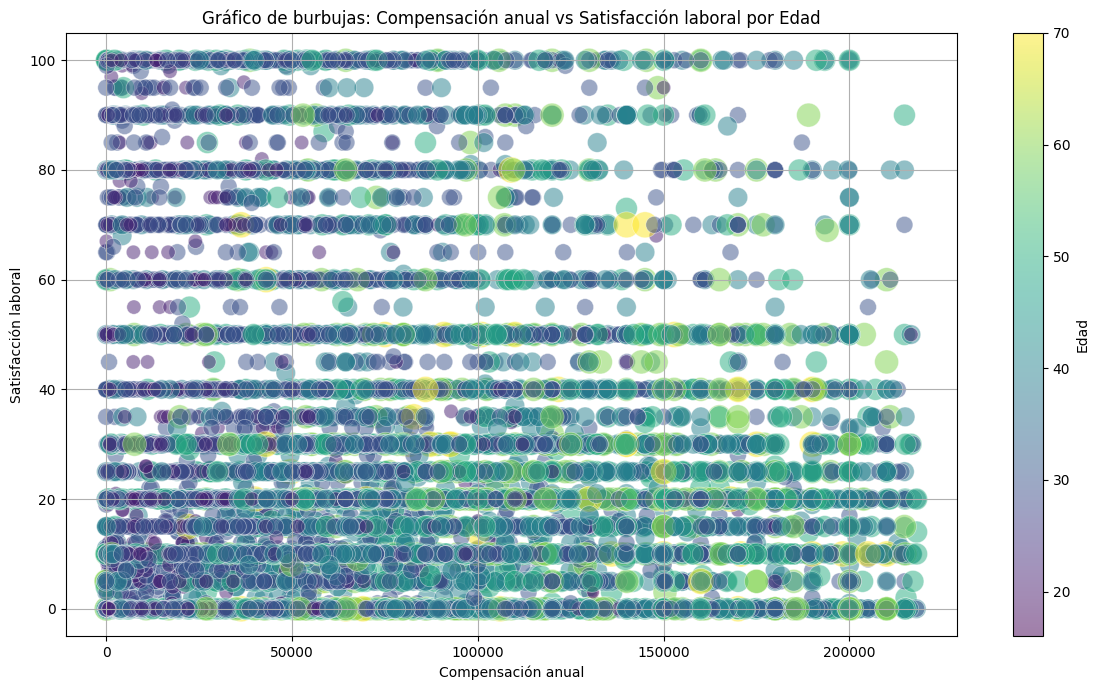

In [6]:
bubble_df = df[["ConvertedCompYearly", "JobSatPoints_6", "Age"]].dropna()

Q1 = bubble_df["ConvertedCompYearly"].quantile(0.25)
Q3 = bubble_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = bubble_df[(bubble_df["ConvertedCompYearly"] >= limite_inferior) & (bubble_df["ConvertedCompYearly"] <= limite_superior)]

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

new_df['AgeNumeric'] = new_df['Age'].map(age_map)

tamaño_burbujas = new_df["AgeNumeric"] * 5

plt.figure(figsize=(12, 7))
plt.scatter(new_df["ConvertedCompYearly"], new_df["JobSatPoints_6"], s=tamaño_burbujas, alpha=0.5, c=new_df["AgeNumeric"], cmap='viridis', edgecolors='w', linewidths=0.5)
plt.title("Gráfico de burbujas: Compensación anual vs Satisfacción laboral por Edad")
plt.xlabel("Compensación anual")
plt.ylabel("Satisfacción laboral")
plt.grid(True)
plt.colorbar(label='Edad')
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



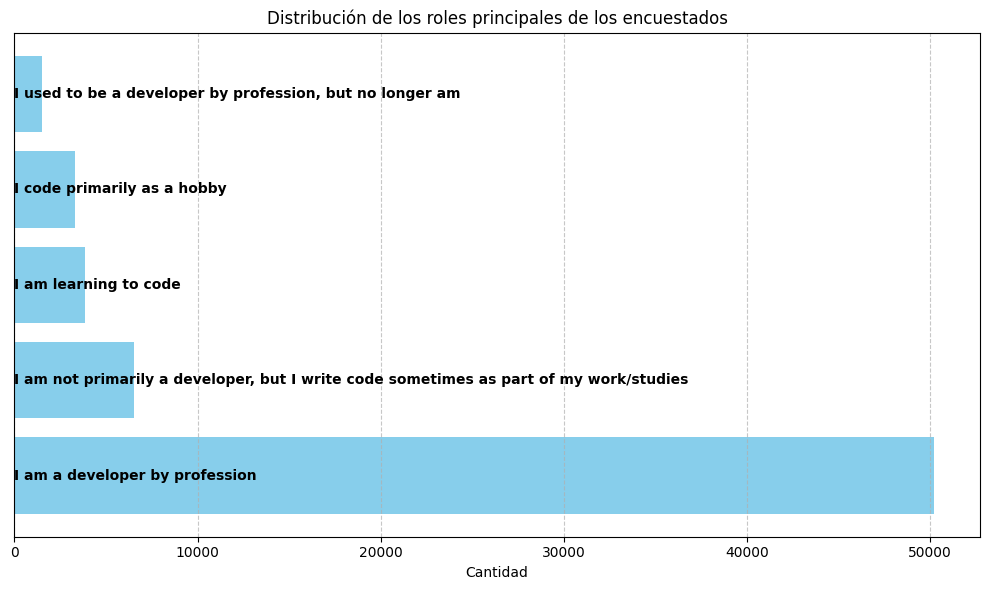

In [12]:
MB_counts = df["MainBranch"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.barh(MB_counts.index, MB_counts.values, color='skyblue')
plt.yticks([])
for bar, label in zip(bars, MB_counts.index):
    plt.text(3, bar.get_y() + bar.get_height()/2, label, va='center', ha='left', color='black', fontsize=10, fontweight='bold')
plt.xlabel('Cantidad')
plt.title('Distribución de los roles principales de los encuestados')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



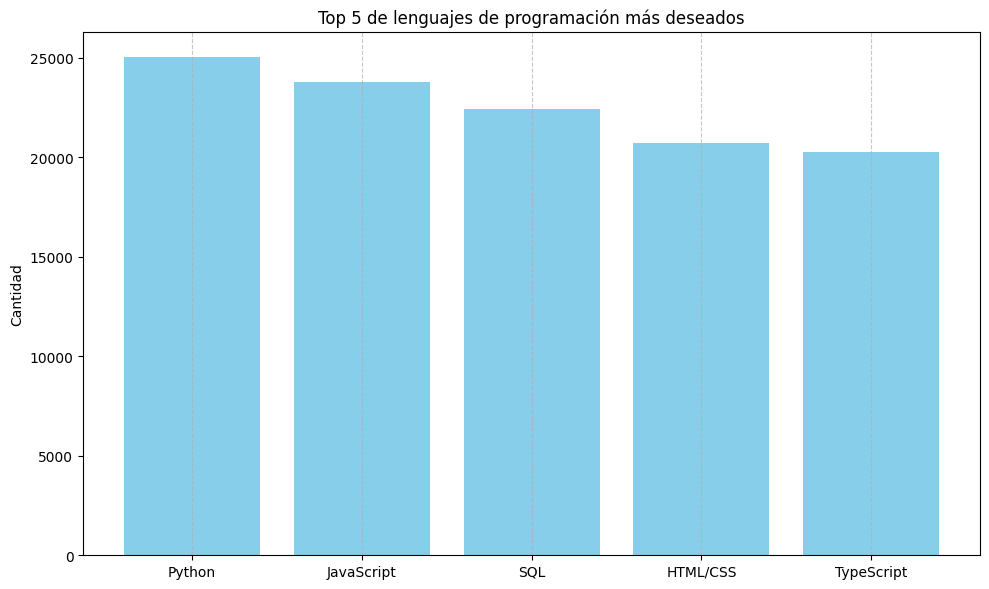

In [22]:
df_lw = df["LanguageWantToWorkWith"].dropna().str.split(";")
all_lw = df_lw.explode()
lw_counts = all_lw.value_counts().head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(lw_counts.index, lw_counts.values, color='skyblue')
plt.ylabel('Cantidad')
plt.title('Top 5 de lenguajes de programación más deseados')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


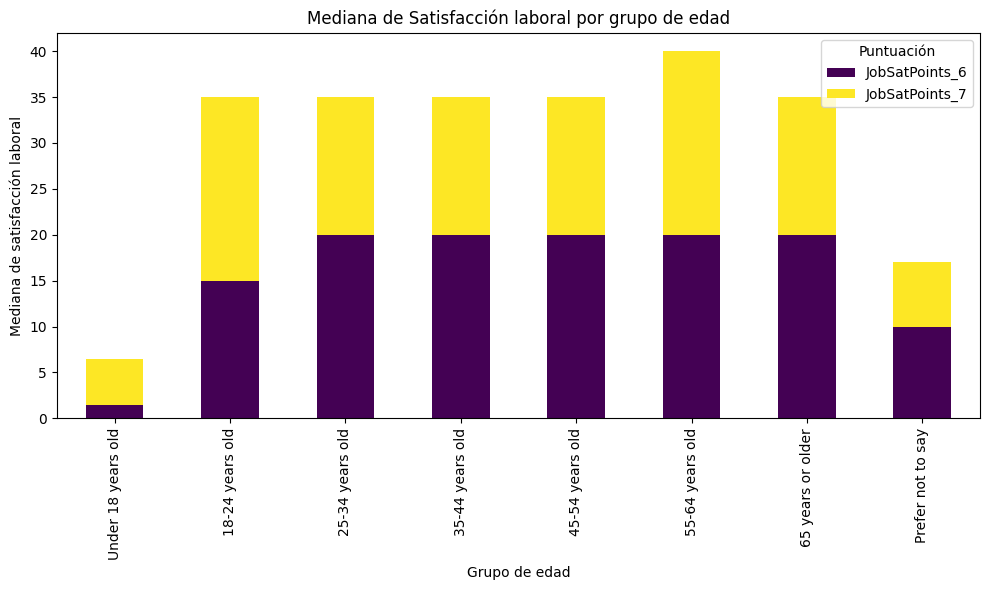

In [24]:
new_df = df[["Age","JobSatPoints_6","JobSatPoints_7"]].dropna()
new_df = new_df.groupby("Age")[['JobSatPoints_6', 'JobSatPoints_7']].median()

age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', "65 years or older", "Prefer not to say"]
new_df = new_df.reindex(age_order)

new_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Mediana de Satisfacción laboral por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Mediana de satisfacción laboral')
plt.legend(title='Puntuación')
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



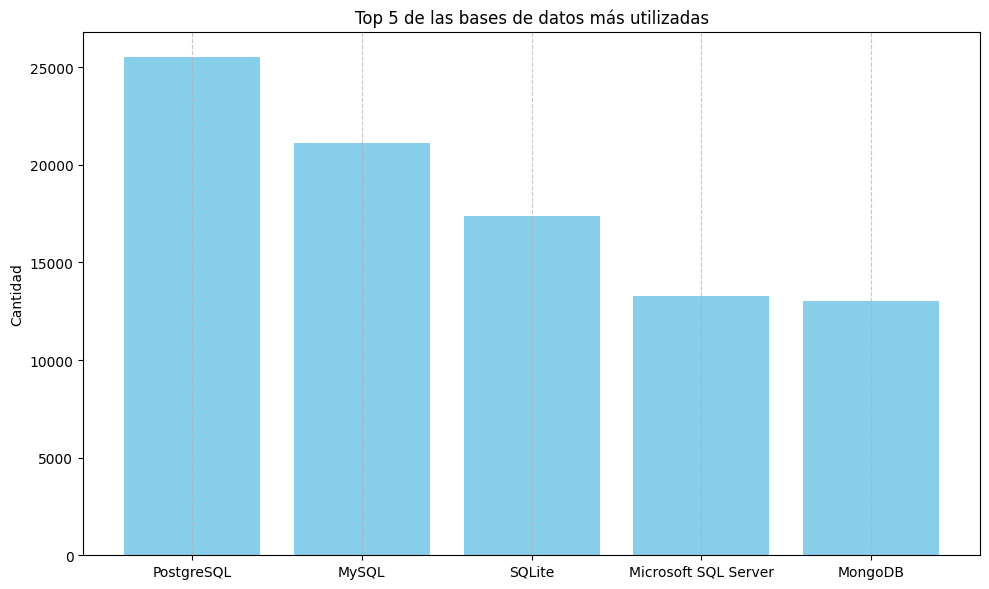

In [27]:
df_db = df["DatabaseHaveWorkedWith"].dropna().str.split(";")
all_db = df_db.explode()
db_counts = all_db.value_counts().head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(db_counts.index, db_counts.values, color='skyblue')
plt.ylabel('Cantidad')
plt.title('Top 5 de las bases de datos más utilizadas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



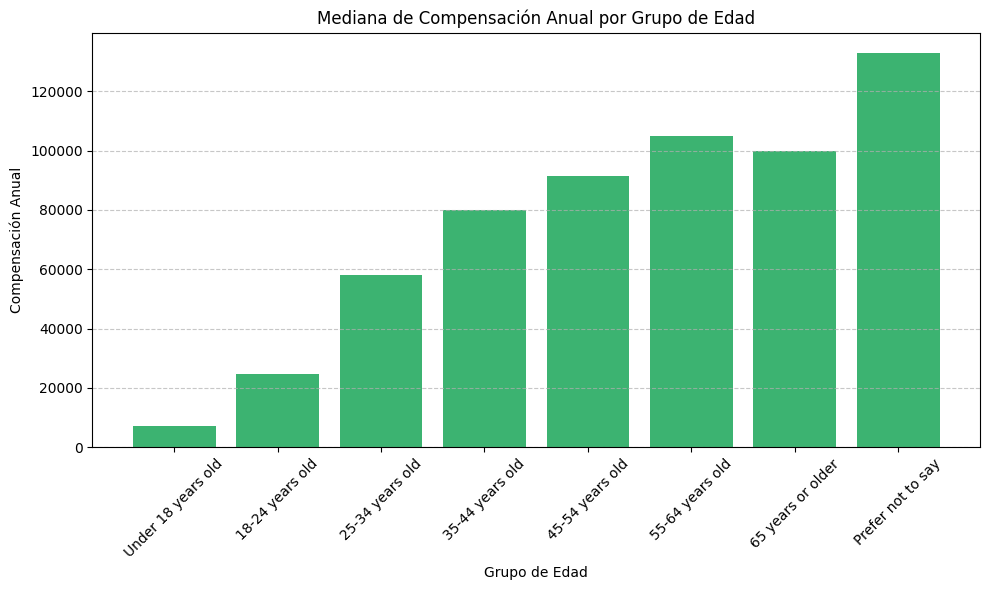

In [28]:
new_df = df[['Age', 'ConvertedCompYearly']].dropna()

Q1 = new_df["ConvertedCompYearly"].quantile(0.25)
Q3 = new_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = new_df[(new_df["ConvertedCompYearly"] >= limite_inferior) & (new_df["ConvertedCompYearly"] <= limite_superior)]

grouped_median = new_df.groupby('Age')['ConvertedCompYearly'].median().sort_index()

age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', "65 years or older", "Prefer not to say"]
grouped_median = grouped_median.reindex(age_order)

plt.figure(figsize=(10, 6))
plt.bar(grouped_median.index, grouped_median.values, color='mediumseagreen')
plt.title('Mediana de Compensación Anual por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Compensación Anual')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



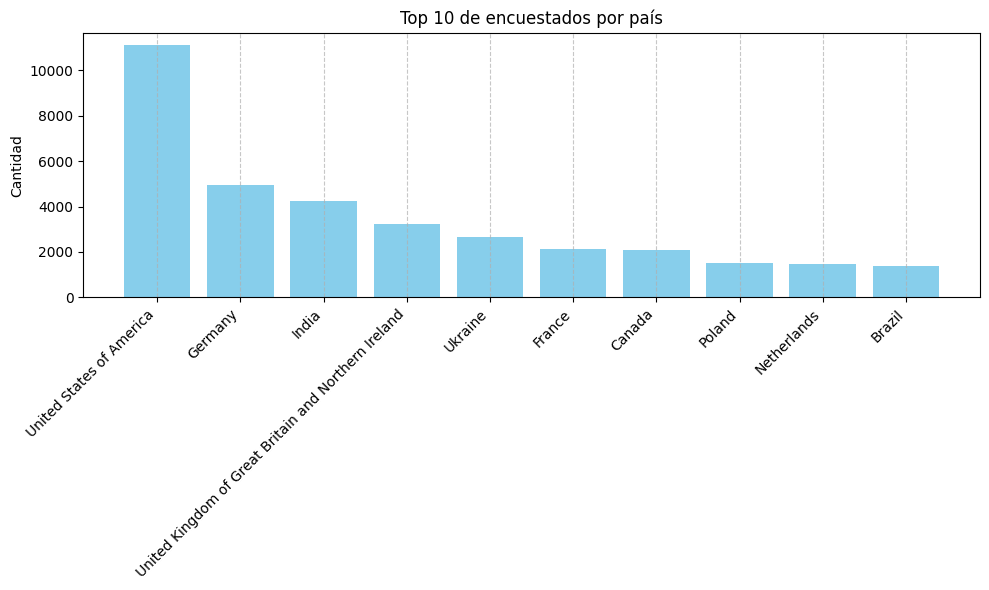

In [31]:
top10_country = df["Country"].dropna().value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_country.index,top10_country.values,color="skyblue")
plt.title("Top 10 de encuestados por país")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
